# Numerisches Lösen der eindimensionalen zeitabhängigen Schrödingergleichung mittels Python

In diesem Beispiel wird [`pySchrodinger`](https://github.com/jakevdp/pySchrodinger) verwendet, um die zeitabhängige Lösung der eindimensionalen Schrödingergleichung bei stationärem externen Potential zu diskutieren. Im weiteren Verlauf werden dann verschiedene Potentialparameter und Ursprungswellenformen diskutiert. 

Die Schrödingergleichung ist das quantenmechanische Gegenstück zur klassischen Formulierung der Gesamtenergie eines Systems, in dem sich der (hier eindimensionale) Ort $x(t)$ eines Teilchens wie eine Welle $\Psi(x, t)$ verhält. Es sei darauf hingewiesen, dass die Schrödingergleichung ein Postulat ist, das sich nicht direkt aus anderen physikalischen Gesetzen ableiten lässt. Formal kann die Schrödingergleichung jedoch aus der (nichtrelativistischen) Hamilton-Funktion für einen Massenpunkt

$$E={\frac {{p}^{2}}{2m}}+V({x},t)$$

hergeleitet werden, indem die klassischen Größen Energie $E$, Impuls $p$ und Ort $r$ durch die entsprechenden quantenmechanischen Operatoren gemäß dem Korrespondenzprinzip ersetzt werden: 

$$\begin{matrix}E&\rightarrow &{\hat E}&=&{\mathrm {i}}\hbar {\frac {\partial }{\partial t}}\\{{p}}&\rightarrow &{ {{\hat p}}}&=&-{\mathrm {i}}\hbar \frac{\partial}{\partial x} \\{{x}}&\rightarrow &{{{\hat x}}}&=&{{x}}\end{matrix}$$

Auf diese Weise wird im Prinzip die Hamiltonfunktion in einen Hamiltonoperator $\mathcal H(x,\hat p,t) = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}+V({x},t)$ umgewandelt, der dann auf die unbekannte Wellenfunktion $\Psi(x,t)$ angewendet werden kann. Die ursprüngliche Hamilton-Funktion lautet nun in der quantenmechanischen Schreibweise:

$$ {\mathrm {i}}\hbar {\frac {\partial \Psi(x,t)}{\partial t}} = \mathcal{H}\Psi(x,t) = -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi(x,t)}{\partial x^2}+V({x},t)\Psi(x,t)$$

Wenn der Hamilton-Operator zeitunabhängig ist, also $\frac{\partial \mathcal H}{\partial t} = 0$, was in der Regel der Fall ist, wenn das Potential "stationär" ist, d.h. $V \equiv V(x)$, dann kann die zeitabhängige Schrödingergleichung mit einem Produktansatz $\Psi(x,t) = \psi(x)\phi(t)$ gelöst werden. Einsetzen von $\Psi(x,t) = \psi(x)\phi(t)$ in die obige Gleichung führt somit zu

$$\mathrm i\hbar \frac{1}{\phi(t)} \frac{\partial\phi(t)}{\partial t}=\frac{1}{\psi(x)}\mathcal{H}\psi(x)$$

Dadurch werden die Variablen voneinander getrennt. Die Gleichung kann für beliebige $x$ und $t$ nur erfüllt werden, wenn beide Seiten gleich einer Konstanten sind; diese Konstante heißt (in weiser Voraussicht) $E$. Daher gilt für die linke und rechte Seite der Gleichung 

$$\mathrm i\hbar \frac{d\phi(t)}{dt}=E\phi(t); \quad E\psi(x) = \mathcal{H}\psi(x) $$

Für den zeitabhängigen Teil handelt sich hier um eine Differentialgleichung erster Ordnung, deren Lösung nach dem allgemeinen Ansatz $\phi(t) = A \exp(Bt)$ gefunden werden kann. Durch Einsetzen von $\phi(t) = A \exp(Bt)$ ergibt sich $B=\frac{E}{\mathrm i\hbar}=-\frac{\mathrm i E}{\hbar}$. Aus der Forderung dass unser Teilchen **zur Zeit** $t$ irgendwo in $x$ zu finden sein muss erhalten wir $A$: 

$$1 \equiv \int_{-\infty}^\infty \Psi^*(x,t)\Psi(x,t) \mathrm{d}x = \int_{-\infty}^\infty\psi^*(x)\phi^*(t)\psi(x)\phi(t)\mathrm{d}x = A^2 \int_{-\infty}^\infty\psi^*(x)\psi(x)\mathrm{d}x \Rightarrow A = 1$$ 

D.h., wir können die Lösung der zeitabhängigen Schrödingergleichung leicht erhalten, indem wir die Lösung für $\psi(x)$ aus der zeitunabhängigen Schrödingergleichung nehmen $\mathcal{H}\psi(x) = E\psi(x)$ und einfach mit $\phi(t)=\exp(-\mathrm{i}\frac{E}{\hbar}t)$ multiplizieren! 

Die stationäre Schrödingergleichung ist ein Eigenwertproblem, bei dem wir nach einer Funktion $\psi(x)$ suchen, die, wenn der Hamiltonoperator auf sie angewendet wird, wieder sich selbst multipliziert mit einem Skalar ergibt. Oft ist jedoch die Suche nach einer Funktion für nichttriviale Potentiale $V(x)$ analytisch nicht mehr möglich, weshalb man auf numerische Methoden zurückgreifen muss. Als Beispiel aus der Elektronenstrukturberechnung sei das Beispiel eines Mehrelektronensystems genannt, bei dem das Potential $V \equiv V(\{\mathbf{r}^N \})$ ist und $\{\mathbf{r}^N \}$ alle dreidimensionalen Koordinaten jedes der $N$ Elektronen darstellt, die sich alle gegenseitig über die Coulomb-Wechselwirkung beeinflussen.


Im Folgenden werden wir die zeitliche Entwicklung der Schrödingergleichung für einige einfache Fälle veranschaulichen. Obwohl es für die meisten der folgenden Fälle eine analytische Lösung gibt, ist es lehrreich, die numerische Lösung mit den analytischen Lösungen zu vergleichen. Zu diesem Zweck laden wir zunächst die dafür benötigten Bibliotheken. 

In [2]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from schrodinger import Schrodinger
%matplotlib notebook

Wir laden hier neben den Standardbibliotheken auch `pySchrodinger`, das uns hilft, die Schrödinger-Gleichung zu animieren und numerisch zu lösen. Für die Animation in `jupyter` müssen wir noch die Interaktivität der notebooks mit `%matplotlib notebook` aktiviern. Bevor wir nun endlich loslegen können, müssen wir auch noch einige Hilfsfunktionen definieren. Zunächst benötigen wir eine Funktion, die unser Wellenpaket im Ortsraum ($x$) und Impulsraum ($k$) darstellt. Setzen Sie die Ausdrücke für die Normalisierung und den Exponentialterm so ein, dass sich ein Gaußsches Wellenpaket der Breite $a$, zentriert bei $x_0$, mit dem Impuls $k_0$ ergibt.

In [3]:
######################################################################
# Hilfsfunktionen für Gaußsche Wellenpakete
def gauss_x(x, a, x0, k0):
    """
    gaußförmiges Wellenpaket der Breite a, zentriert bei x0, mit dem Impuls k0
    """
    # norm = ...     # modify
    # exponent = ... # modify
    norm = (a * np.sqrt(np.pi)) ** (-0.5)                      
    exponent = -0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0   
    return norm * np.exp(exponent)


def gauss_k(k, a, x0, k0):
    """
    analytische Fourier-Transformation von gauss_x(x), oben
    """
    # norm = ...     # modify
    # exponent = ... # modify
    norm = (a / np.sqrt(np.pi)) ** 0.5                         
    exponent = -0.5 * (a * (k - k0)) ** 2 - 1j * (k - k0) * x0
    return norm * np.exp(exponent)

Wir brauchen auch zwei Hilfsfunktion, die für uns eine rechteckige Barriere erstellt:

In [4]:
######################################################################
# Hilfsfunktionen für Barriere
def theta(x):
    """
    theta :
      returns 0 if x<=0, and 1 if x>0
    """
    x = np.asarray(x)
    y = np.zeros(x.shape)
    y[x > 0] = 1.0
    return y

def square_barrier(x, width, height):
    return height * (theta(x) - theta(x - width))

Als nächstes müssen wir ein paar Parameter für unsere "Simulation" festlegen. Der Potentialtopf ist bereits definiert und hat seine Grenzen bei $(-98,98)$. Versuche nun, eine kleine Barriere bei $x = 0$ mit der Höhe $V_0 = 1.5$ zu definieren.

In [5]:
# Zeitschritte und Dauer festlegen
dt = 0.01
N_steps = 50
t_max = 120

frames = int(t_max / float(N_steps * dt))

# Konstanten festlegen
hbar = 1.0   # Planck-Konstante / 2*pi
m = 2.0      # Teilchenmasse

# Bereich der x-Koordinate mit gleichmäßig verteilten Werten festlegen
N = 2 ** 11
dx = 0.1

x = dx * (np.arange(N) - 0.5 * N)

# Spezifiziere Potentialtopf und Barriere
#V0 = ... # modify
V0 = 1.5
L = hbar / np.sqrt(2 * m * V0)
a = 3 * L
x0 = -60 * L
#V_x = square_barrier(...,...,...) # modify
V_x = square_barrier(x, a, V0) 
V_x[x < -98] = 1E6
V_x[x > 98] = 1E6

# Anfangsimpuls und die davon abgeleiteten Größen 
p0 = np.sqrt(2 * m * 0.2 * V0)
dp2 = p0 * p0 * 1. / 80
d = hbar / np.sqrt(2 * dp2)

k0 = p0 / hbar
v0 = p0 / m
psi_x0 = gauss_x(x, d, x0, k0)

Bevor wir das Gaußsche Wellenpaket mit `matplotlib` animieren und visualisieren können, müssen wir zunächst `pySchrodinger` mit einigen Standardwerten instanziieren, um die Schrödinger-Gleichung für den ersten Zeitschritt lösen zu können. $k_0$ ist hier der Minimalwert von $k$. Beachte, dass aufgrund der Funktionsweise der schnellen Fourier-Transformation die Impulswellenzahl im Bereich $k0 < k < 2\pi / dx$ definiert wird, wobei $dx = x[1]-x[0]$.

In [6]:
# Instanziere das Schrödinger-Objekt, das die Berechnungen durchführt
S = Schrodinger(x=x,
                psi_x0=psi_x0,
                V_x=V_x,
                hbar=hbar,
                m=m,
                k0=-28)

<IPython.core.display.Javascript object>


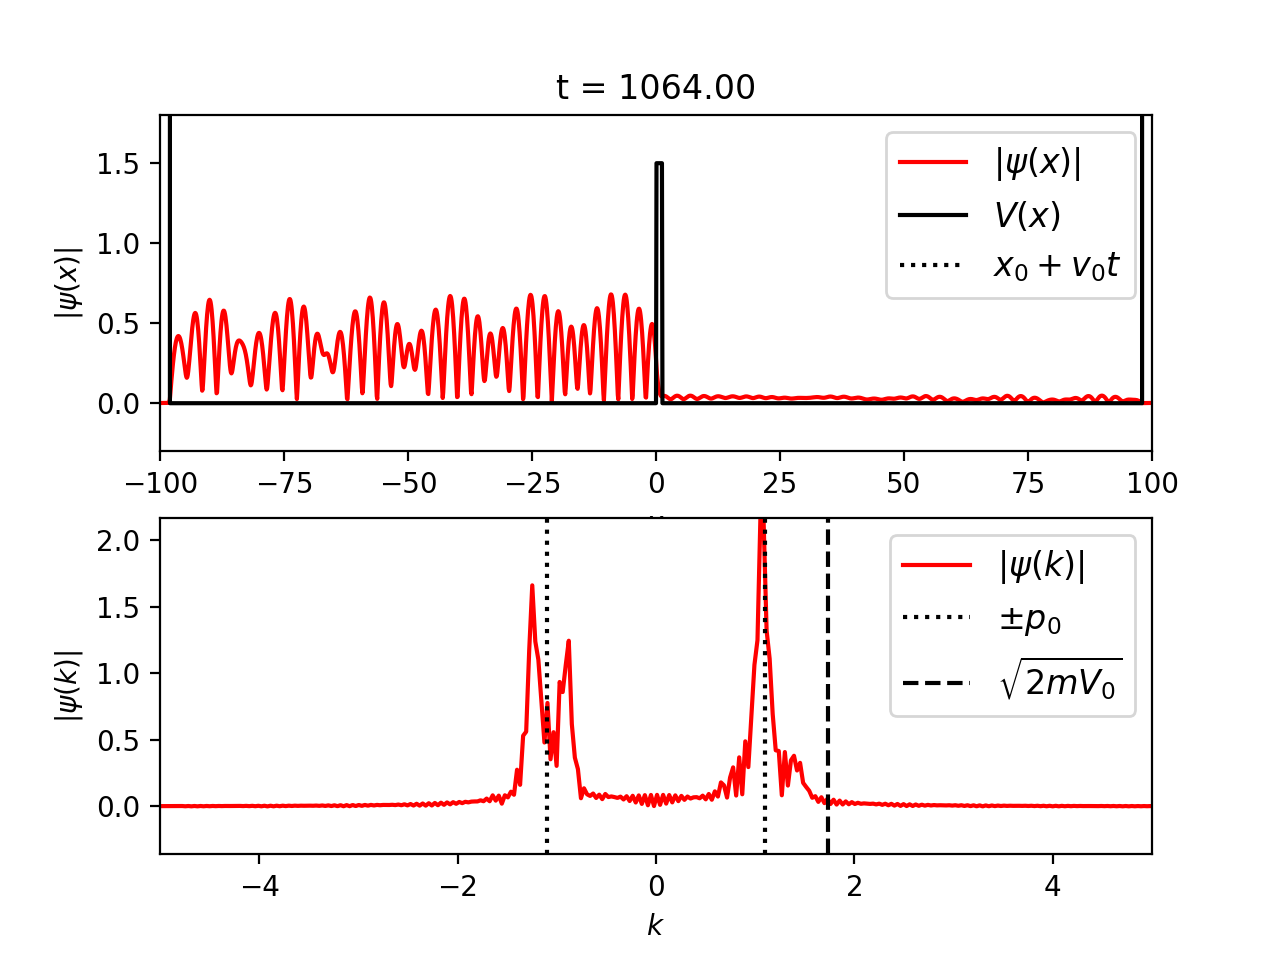

In [7]:
######################################################################
# Functions to Animate the plot
def init():
    psi_x_line.set_data([], [])
    V_x_line.set_data([], [])
    center_line.set_data([], [])

    psi_k_line.set_data([], [])
    title.set_text("")
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)


def animate(i):
    S.time_step(dt, N_steps)
    psi_x_line.set_data(S.x, 4 * abs(S.psi_x))
    V_x_line.set_data(S.x, S.V_x)
    center_line.set_data(2 * [x0 + S.t * p0 / m], [0, 1])

    psi_k_line.set_data(S.k, abs(S.psi_k))
    title.set_text("t = %.2f" % S.t)
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

######################################################################
# Set up plot
fig = plt.figure()

# Setze Begrenzungen
xlim = (-100, 100)
klim = (-5, 5)

# Oberes Panel zeigt den Ortsraum 
ymin = 0
ymax = V0
ax1 = fig.add_subplot(211, xlim=xlim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_x_line, = ax1.plot([], [], c='r', label=r'$|\psi(x)|$')
V_x_line, = ax1.plot([], [], c='k', label=r'$V(x)$')
center_line = ax1.axvline(0, c='k', ls=':', label=r"$x_0 + v_0t$")

title = ax1.set_title("")
ax1.legend(prop=dict(size=12))
ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$|\psi(x)|$')

# Unteres Panel zeigt den Impulsraum 
ymin = abs(S.psi_k).min()
ymax = abs(S.psi_k).max()
ax2 = fig.add_subplot(212, xlim=klim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_k_line, = ax2.plot([], [], c='r', label=r'$|\psi(k)|$')

p0_line1 = ax2.axvline(-p0 / hbar, c='k', ls=':', label=r'$\pm p_0$')
p0_line2 = ax2.axvline(p0 / hbar, c='k', ls=':')
mV_line = ax2.axvline(np.sqrt(2 * V0) / hbar, c='k', ls='--',
                      label=r'$\sqrt{2mV_0}$')
ax2.legend(prop=dict(size=12))
ax2.set_xlabel('$k$')
ax2.set_ylabel(r'$|\psi(k)|$')

V_x_line.set_data(S.x, S.V_x)

So sieht also unser Potentialtopf aus. Schauen Sie sich die beiden Abbildungen an und diskutieren Sie, was die einzelnen Plots bedeuten. Danach starten wir die Animation!

In [8]:
# den Animator aufrufen.
# blit=True bedeutet, dass nur die Teile neu gezeichnet werden, die sich geändert haben.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=30, blit=True)
plt.show()

## Aufgabe 1: Welche Einheiten wurden hier verwendet?  

... (Lösung: atomare Einheiten) 

## Aufgabe 2: Was bedeutet eine Masse von 2 in diesem Fall? 

... (Lösung: Partikel ist doppelt so schwer wie ein Elektron) 

## Aufgabe 3: Wie wirken sich verschiedene Barrieren auf die Ausbreitung aus?

### (a): Wie wurden unendlich hohe Barriere mit diesem Tool realisiert? Diskutieren sie den Unterschied zu einem endlichen Potential.

### (b) Was passiert bei langen Zeiten, wenn die Barrieren endlich sind und in der Größenordnung der Energie des Teilchens liegen?

... (Lösung: Abnahme der Aufenthaltswahrscheinlichkeit im Topf)

### (c): Wie lautet die Schrödingergleichung und deren Lösung für ein freies (d.h. $V(x,t)\equiv0$) Teilchen? Lösen sie die Schrödingergleichung für ein freies Teilchen numerisch. Diskutieren sie periodische Randbedingungen.

### (d): Lässt sich hiermit auch ein harmonisches Potentialtopf simulieren?

## Aufgabe 4: Wie wirken sich andere Wellenformen auf die Ausbreitung aus? 

### (a): Eine Rechteckform?

### (b): Kollision von zwei Wellenpaketen?